In [1]:
# ========================================
# 1. Mount Google Drive
# ========================================
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
# ========================================
# 2. Import libraries
# ========================================
import zipfile
import os
import random
import matplotlib.pyplot as plt
import skimage.io as io
from pycocotools.coco import COCO
import numpy as np

In [3]:
# ========================================
# 3. File paths (adjusted to your Drive structure)
# ========================================
zip_val = "/content/drive/MyDrive/infosys_ai_vision_extract/val2017.zip"
zip_ann = "/content/drive/MyDrive/infosys_ai_vision_extract/annotations_trainval2017.zip"

In [4]:
# Extract validation images
with zipfile.ZipFile(zip_val, 'r') as zip_ref:
    zip_ref.extractall("/content")


In [5]:
# Extract annotations
with zipfile.ZipFile(zip_ann, 'r') as zip_ref:
    zip_ref.extractall("/content")

In [6]:
# ========================================
# 4. Initialize COCO API
# ========================================
annFile = '/content/annotations/instances_val2017.json'
coco = COCO(annFile)

loading annotations into memory...
Done (t=0.61s)
creating index...
index created!


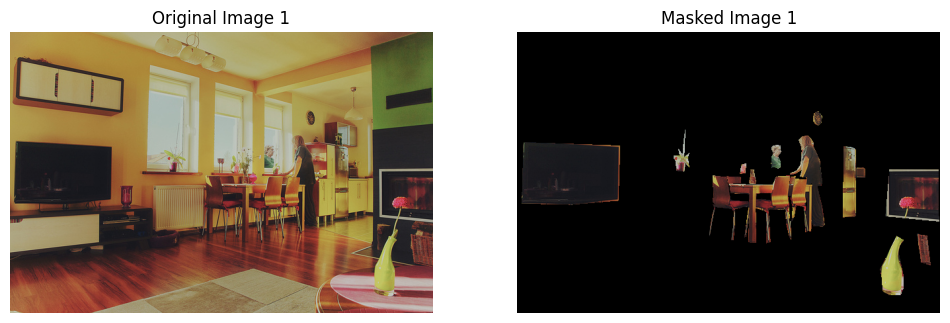

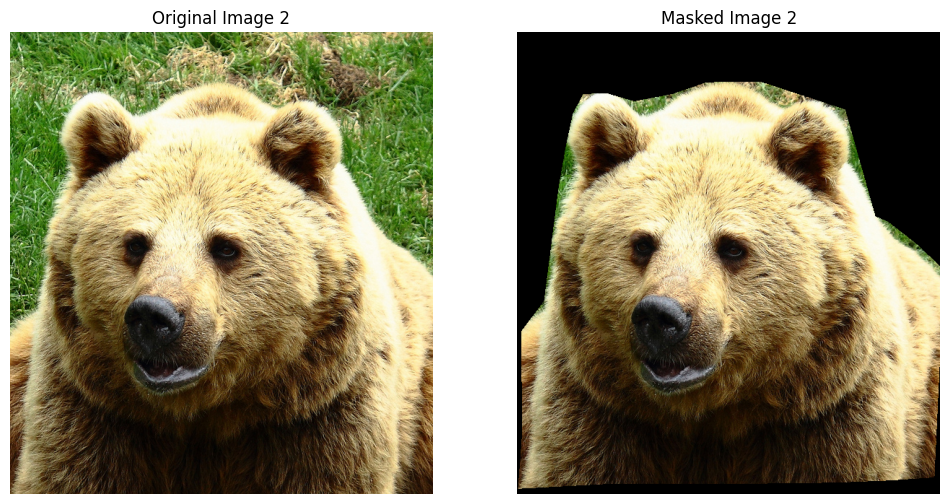

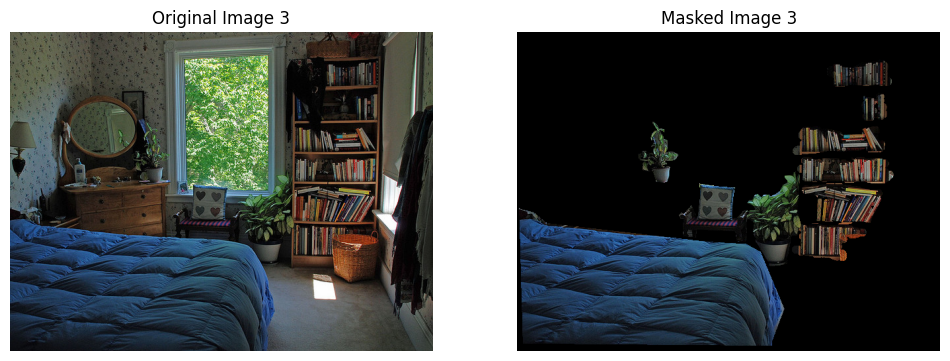

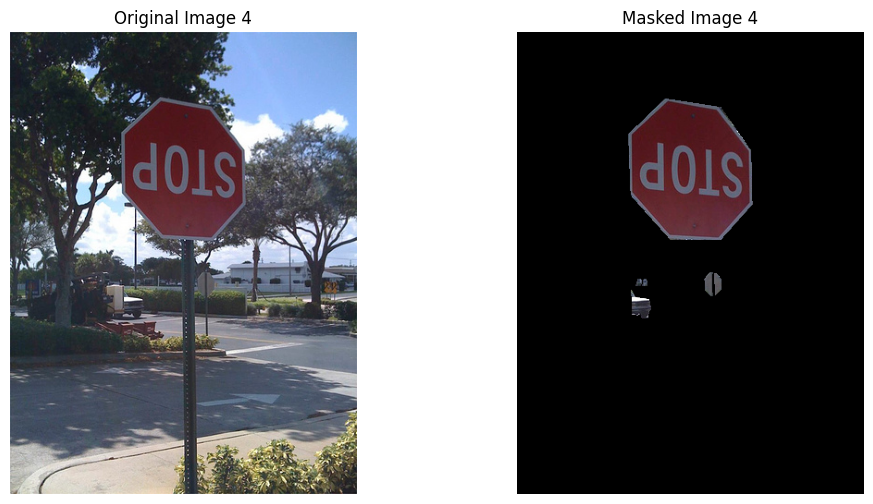

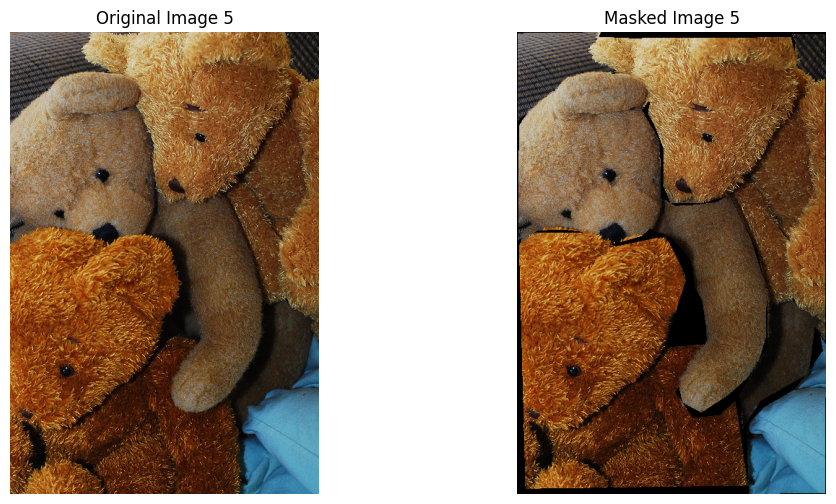

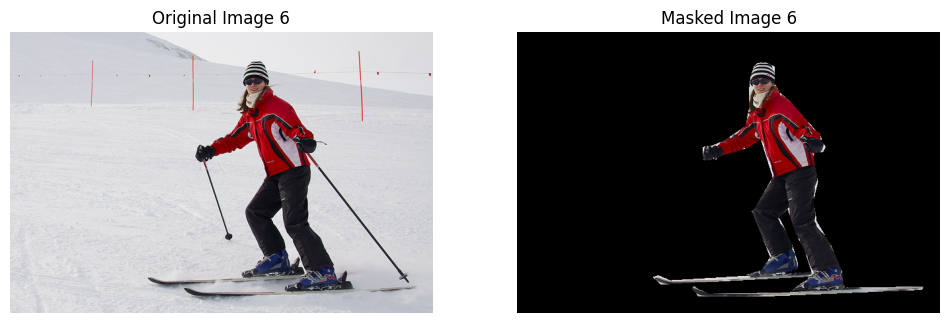

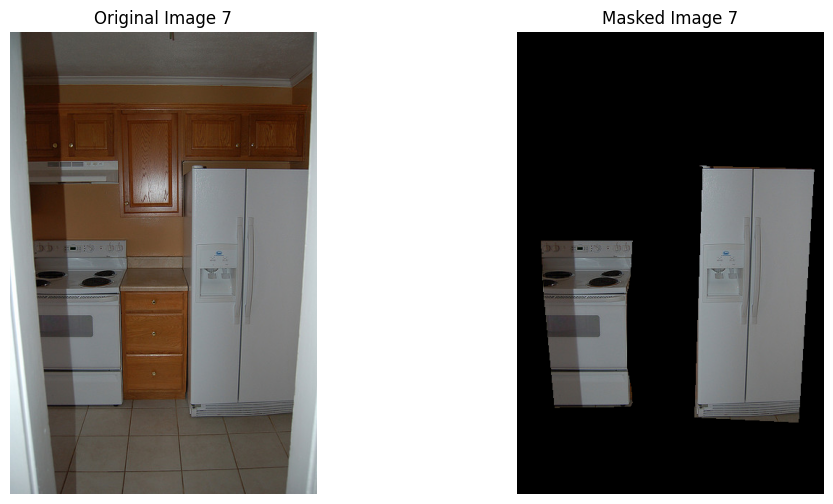

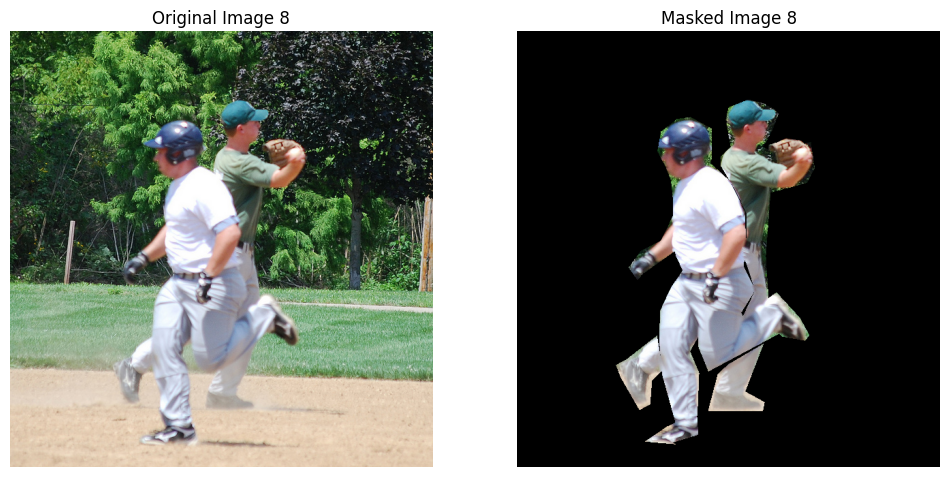

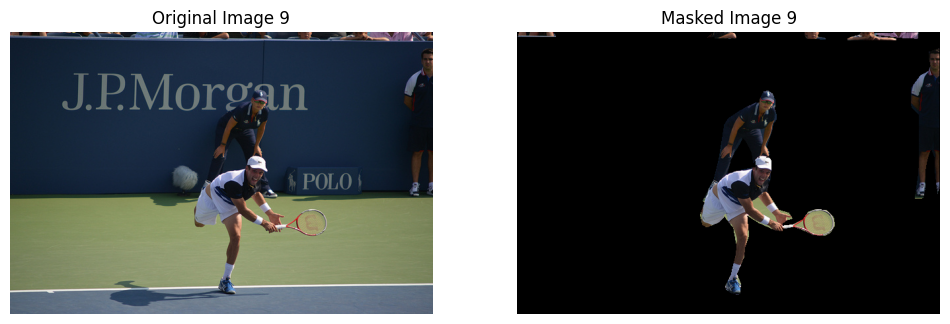

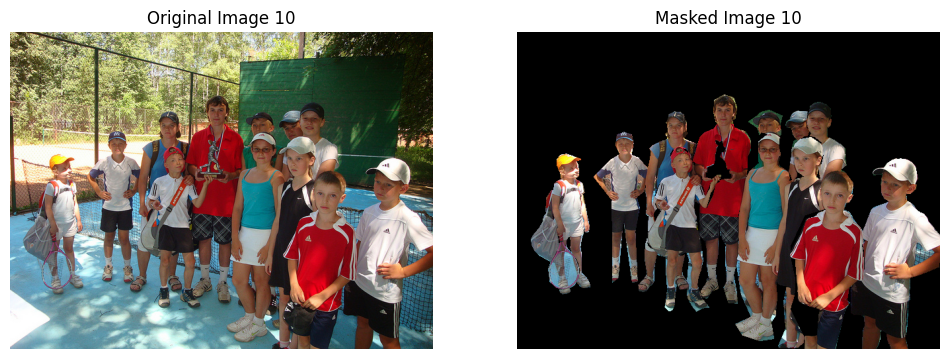

In [9]:
import glob

# Path to extracted validation images
val_dir = "/content/val2017"

# Get sorted list of image filenames
val_images = sorted(glob.glob(val_dir + "/*.jpg"))

# Take first 10 images
val_images_10 = val_images[:10]

for idx, img_path in enumerate(val_images_10):
    # Get image ID (from filename)
    img_id = int(os.path.basename(img_path).split(".")[0])

    # Load image
    I = io.imread(img_path)

    # Get annotations
    ann_ids = coco.getAnnIds(imgIds=img_id, iscrowd=None)
    anns = coco.loadAnns(ann_ids)

    # Build mask
    mask = np.zeros((I.shape[0], I.shape[1]), dtype=np.uint8)
    for ann in anns:
        m = coco.annToMask(ann)
        mask = np.maximum(mask, m)

    # Apply mask
    masked_img = np.zeros_like(I)
    if I.ndim == 3:
        for c in range(3):
            masked_img[:, :, c] = I[:, :, c] * mask
    else:
        masked_img = I * mask

    # Show side by side
    plt.figure(figsize=(12,6))
    plt.subplot(1,2,1)
    plt.title(f"Original Image {idx+1}")
    plt.imshow(I)
    plt.axis('off')

    plt.subplot(1,2,2)
    plt.title(f"Masked Image {idx+1}")
    plt.imshow(masked_img)
    plt.axis('off')

    plt.show()